Final Tutorial

In [38]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import spotipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use xml files to scrape from spotify charts
for each track show their streams per day, maybe as an array or another dataframe
from there spotipy api can be used to observe the details of these songs

In [39]:
# Collect links from spotify charts top 200 streams per day
ref_str = "https://spotifycharts.com/regional/global/daily/"
ref_arr = []

# gets every day from janurary 2017 to October 2020

# for year in range(2017, 2021):
for year in range(2017, 2018):
    date = ""
    
    endingMonth = 12
    if year == 2020:
        endingMonth = 10
        
    # for month in range (1, endingMonth + 1):
    for month in range (1,2):
       
        dayCount = -1

        #gets proper day count per month
        thirtyDayCountMonths = [4, 6, 9, 11]
        if month == 2:
            dayCount = 29
        elif month in thirtyDayCountMonths:
            dayCount = 30
        else:
            dayCount = 31

        if int(month) < 10:
            month = "0" + str(month)
        # for day in range (1, daycount + 1):
        for day in range (1, 16):
           
            if int(day) < 10:
                day = "0" + str(day)

            date = str(year) + "-" + str(month) + "-" + str(day) + "/download"
            date = ref_str + date
            ref_arr.append(date)

ref_arr

['https://spotifycharts.com/regional/global/daily/2017-01-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-02/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-03/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-04/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-05/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-06/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-07/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-08/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-09/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-10/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-11/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-12/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-13/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-14/dow

In [76]:
#Loop downloading and appending of dataframes 

df = pd.DataFrame(columns =['position', 'track_name', 'artist', 'streams', 'url', 'date'] )
#make dir to save to
path = "sheets"
folderExists = False
try:
    os.mkdir(path)
except OSError:
    print ("Folder already exists")
    folderExists = True

if not folderExists:
    for i in ref_arr:
        r = requests.get(i, allow_redirects = True)
        #String manipulation to read from the correct csv files
        date = i[48:58]
        #print(date)
        fileName = "regional-global-daily-" + date + ".csv"
        #print(fileName)
        open(fileName, "wb").write(r.content)

        os.rename(fileName, "sheets/" + fileName)

        df_new = pd.read_csv(path + "/" + fileName)
        df_new.columns= ['position', 'track_name', 'artist', 'streams', 'url']
        df_new['date'] = date
        
        df_new = df_new.iloc[1:] #deletes junk row from csv conversion
        df = df.append(df_new)
        print("Downloading...")

    print("Done")
df.drop(['position'], axis=1, inplace=True) #delete position row since rank alraedy has this information
#streams are a string of a num, must wrap as type int always
df['streams'] = df['streams'].astype(int)

In [41]:
df

track_name            artist  streams  \
1                                    Starboy        The Weeknd  3135625   
2                                     Closer  The Chainsmokers  3015525   
3                            Let Me Love You          DJ Snake  2545384   
4    Rockabye (feat. Sean Paul & Anne-Marie)      Clean Bandit  2356604   
5                                  One Dance             Drake  2259887   
..                                       ...               ...      ...   
196                                 You & Me     Marc E. Bassy   348357   
197                       Can't Feel My Face        The Weeknd   347804   
198                            White Iverson       Post Malone   342787   
199                          Te Quiero Pa´Mi          Don Omar   342480   
200                       When We Were Young             Adele   338261   

                                                   url        date  
1    https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01  
2    https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01  
3    https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01  
4    https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01  
5    https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01  
..                                                 ...         ...  
196  https://open.spotify.com/track/4QdovcM8j50QPly...  2017-01-15  
197  https://open.spotify.com/track/6RsWqX8zABZLhZy...  2017-01-15  
198  https://open.spotify.com/track/6eT7xZZlB2mwyzJ...  2017-01-15  
199  https://open.spotify.com/track/3BY2mafsbsoKGqS...  2017-01-15  
200  https://open.spotify.com/track/7IWkJwX9C0J7tHu...  2017-01-15  

[3000 rows x 5 columns]

In [42]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID="ea1a162fbc6f413990542b76ab82a168"
SPOTIPY_CLIENT_SECRET="a09882042ce54f158fdd2b6baaf2b26d"
SPOTIPY_CLIENT_REDIRECT="http://www.cs.umd.edu/class/fall2020/cmsc320-0201/"

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_CLIENT_REDIRECT))

results = sp.current_user_saved_tracks()


# How to get audio features of a track from our data frame
#not needed anymore but good refrence for how to get trackdata
#trackName = df.iloc[0].at['track_name']
#trackNameWithoutSpaces = '+'.join(trackName.split())
#print(trackNameWithoutSpaces)
#trackItem = sp.search(trackNameWithoutSpaces, 1, 0)
#track_id = trackItem['tracks']['items'][0]['id']
#audiofeatures = sp.audio_features(track_id)
#print(track_id)
#audiofeatures[0]

In [43]:
#gets artist genres and artist ids for each artist in dataframe and puts them in arrays
# artist_genres = []
# artist_ids = []

# for index, row in df.iterrows():
#     artist = row['artist']
#     #print(index)
#     #print(artist)
#     trackArtistWithoutSpaces = '+'.join(artist.split())
#     result = sp.search(trackArtistWithoutSpaces)
#     track = result['tracks']['items'][0]
#     artist_id = track["artists"][0]["id"]
#     #print(artist_id)
#     #print(track)
#     artist_ids.append(artist_id)
#     artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
#     artist_genres.append(artist["genres"])
#     #print(artist["genres"])



In [44]:
#add artist id and genres to dataframe
# df['Artist Id'] = artist_ids
# df['artist_genres'] = artist_genres

In [45]:
#print(df["artist_genres"])

#creates new column in dataframe based on genre filter within filter func
# def filt_func(genre_list):
#     genre = ['pop','rap','edm','rock','indie']
#     result = list(filter(lambda x: x in genre, genre_list))
#     return "other" if len(result) == 0 else result[0]
#     #print(result)
# df['genre'] = df['artist_genres'].apply(lambda x: filt_func(x))
# df['streams'] = df['streams'].apply(lambda x: int(x))

In [51]:

audioFeaturesDf = pd.DataFrame(columns=["duration_ms", "key", "mode", "time_signature", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo", "id", "uri", "track_href", "analysis_url", "type"])

#Example lookup of a song 
trackName = df.iloc[0].at['track_name']
trackNameWithoutSpaces = '+'.join(trackName.split())
trackItem = sp.search(trackNameWithoutSpaces, 1, 0)
track_id = trackItem['tracks']['items'][0]['id']
audiofeatures = sp.audio_features(track_id)
print(track_id)
print(audiofeatures[0]['danceability'])
print(row['track_name'])

7MXVkk9YMctZqd1Srtv4MB
0.679
Love Yourself


In [53]:
import time

tic = time.perf_counter()

#Take each song and lookup its audio features, then create a dataframe for them
print("Searching...")
for index, row in df.iterrows():
    trackName = df.iloc[index - 1].at['track_name']
    trackNameWithoutSpaces = '+'.join(trackName.split())
    trackItem = sp.search(trackNameWithoutSpaces, 1, 0)
    audiofeatures = {'duration_ms' : np.nan, 'key' : np.nan, 'mode' : np.nan, 'time_signature' : np.nan, 'acousticness' : np.nan, 'danceability' : np.nan, 'energy' : np.nan, 'instrumentalness' : np.nan, 'liveness' : np.nan, 'loudness' : np.nan, 'speechiness' : np.nan, 'valence' : np.nan, 'tempo' : np.nan, 'id' : np.nan, 'uri' : np.nan, 'track_href' : np.nan, 'analysis_url' : np.nan, 'type' : np.nan, }
    if (len(trackItem['tracks']['items']) != 0):
        track_id = trackItem['tracks']['items'][0]['id']
        audiofeatures = sp.audio_features(track_id)[0]
    audioFeaturesDf = audioFeaturesDf.append(audiofeatures, ignore_index=True)
toc = time.perf_counter()
print(f"Searches took {toc - tic:0.4f} mf seconds damn")



audioFeaturesDf

Searches took 598.1597 mf seconds damn


duration_ms key mode time_signature  acousticness  danceability  energy  \
0         230453   7    1              4       0.14100         0.679   0.587   
1         244960   8    1              4       0.41400         0.748   0.524   
2         256733   7    0              4       0.23500         0.656   0.578   
3         251088   9    0              4       0.40600         0.720   0.763   
4         173987   1    1              4       0.00776         0.792   0.625   
...          ...  ..  ...            ...           ...           ...     ...   
3071      256533   7    1              4       0.23300         0.675   0.562   
3072      198253   5    1              4       0.40700         0.493   0.738   
3073      245493   8    1              4       0.03800         0.633   0.634   
3074      224693   2    1              4       0.07170         0.516   0.764   
3075      219333   1    1              4       0.12700         0.789   0.858   

      instrumentalness  liveness  loudness  speechiness  valence    tempo  \
0             0.000006    0.1370    -7.015       0.2760    0.486  186.003   
1             0.000000    0.1110    -5.599       0.0338    0.661   95.010   
2             0.000000    0.1180    -8.970       0.0922    0.556   94.514   
3             0.000000    0.1800    -4.068       0.0523    0.742  101.965   
4             0.001800    0.3290    -5.609       0.0536    0.370  103.967   
...                ...       ...       ...          ...      ...      ...   
3071          0.000000    0.0816    -7.678       0.0352    0.309  130.098   
3072          0.000000    0.1300    -6.921       0.2620    0.219  176.071   
3073          0.006400    0.0385   -12.115       0.0725    0.872  100.499   
3074          0.000000    0.1150    -6.223       0.0366    0.376  148.021   
3075          0.000000    0.3490    -5.542       0.3110    0.775  140.022   

                          id                                   uri  \
0     7MXVkk9YMctZqd1Srtv4MB  spotify:track:7MXVkk9YMctZqd1Srtv4MB   
1     7BKLCZ1jbUBVqRi2FVlTVw  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw   
2     3ibKnFDaa3GhpPGlOUj7ff  spotify:track:3ibKnFDaa3GhpPGlOUj7ff   
3     5knuzwU65gJK7IF5yJsuaW  spotify:track:5knuzwU65gJK7IF5yJsuaW   
4     1zi7xx7UVEFkmKfv06H8x0  spotify:track:1zi7xx7UVEFkmKfv06H8x0   
...                      ...                                   ...   
3071  6eT7xZZlB2mwyzJ2sUKG6w  spotify:track:6eT7xZZlB2mwyzJ2sUKG6w   
3072  1ISsiC4Fw6f96kZQegLGiJ  spotify:track:1ISsiC4Fw6f96kZQegLGiJ   
3073  1h2xVEoJORqrg71HocgqXd  spotify:track:1h2xVEoJORqrg71HocgqXd   
3074  1NhPKVLsHhFUHIOZ32QnS2  spotify:track:1NhPKVLsHhFUHIOZ32QnS2   
3075  4Li2WHPkuyCdtmokzW2007  spotify:track:4Li2WHPkuyCdtmokzW2007   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/7MXVkk9YMctZ...   
1     https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...   
2     https://api.spotify.com/v1/tracks/3ibKnFDaa3Gh...   
3     https://api.spotify.com/v1/tracks/5knuzwU65gJK...   
4     https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...   
...                                                 ...   
3071  https://api.spotify.com/v1/tracks/6eT7xZZlB2mw...   
3072  https://api.spotify.com/v1/tracks/1ISsiC4Fw6f9...   
3073  https://api.spotify.com/v1/tracks/1h2xVEoJORqr...   
3074  https://api.spotify.com/v1/tracks/1NhPKVLsHhFU...   
3075  https://api.spotify.com/v1/tracks/4Li2WHPkuyCd...   

                                           analysis_url            type  
0     https://api.spotify.com/v1/audio-analysis/7MXV...  audio_features  
1     https://api.spotify.com/v1/audio-analysis/7BKL...  audio_features  
2     https://api.spotify.com/v1/audio-analysis/3ibK...  audio_features  
3     https://api.spotify.com/v1/audio-analysis/5knu...  audio_features  
4     https://api.spotify.com/v1/audio-analysis/1zi7...  audio_features  
...                                                 ...             ...  
3071  https://api.spotify.com/v1/audio-analysis/6eT

In [57]:
#Append audio features to master dataframe
audioFeaturesDf
df['duration_ms'] = audioFeaturesDf['duration_ms']
df['acousticness'] = audioFeaturesDf['acousticness']
df['danceability'] = audioFeaturesDf['danceability']
df['energy'] = audioFeaturesDf['energy']
df['instrumentalness'] = audioFeaturesDf['instrumentalness']
df['liveness'] = audioFeaturesDf['liveness']
df['loudness'] = audioFeaturesDf['loudness']
df['speechiness'] = audioFeaturesDf['speechiness']
df['valence'] = audioFeaturesDf['valence']
df['tempo'] = audioFeaturesDf['tempo']
df

track_name            artist  streams  \
1                                    Starboy        The Weeknd  3135625   
2                                     Closer  The Chainsmokers  3015525   
3                            Let Me Love You          DJ Snake  2545384   
4    Rockabye (feat. Sean Paul & Anne-Marie)      Clean Bandit  2356604   
5                                  One Dance             Drake  2259887   
..                                       ...               ...      ...   
196                                 You & Me     Marc E. Bassy   348357   
197                       Can't Feel My Face        The Weeknd   347804   
198                            White Iverson       Post Malone   342787   
199                          Te Quiero Pa´Mi          Don Omar   342480   
200                       When We Were Young             Adele   338261   

                                                   url        date  \
1    https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017-01-01   
2    https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017-01-01   
3    https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017-01-01   
4    https://open.spotify.com/track/5knuzwU65gJK7IF...  2017-01-01   
5    https://open.spotify.com/track/1xznGGDReH1oQq0...  2017-01-01   
..                                                 ...         ...   
196  https://open.spotify.com/track/4QdovcM8j50QPly...  2017-01-15   
197  https://open.spotify.com/track/6RsWqX8zABZLhZy...  2017-01-15   
198  https://open.spotify.com/track/6eT7xZZlB2mwyzJ...  2017-01-15   
199  https://open.spotify.com/track/3BY2mafsbsoKGqS...  2017-01-15   
200  https://open.spotify.com/track/7IWkJwX9C0J7tHu...  2017-01-15   

    duration_ms  acousticness  danceability  energy  instrumentalness  \
1        244960       0.41400         0.748   0.524          0.000000   
2        256733       0.23500         0.656   0.578          0.000000   
3        251088       0.40600         0.720   0.763          0.000000   
4        173987       0.00776         0.792   0.625          0.001800   
5        210937       0.10500         0.928   0.481          0.000000   
..          ...           ...           ...     ...               ...   
196      225813       0.02990         0.718   0.808          0.004140   
197      205879       0.05590         0.852   0.553          0.000000   
198      258987       0.60700         0.614   0.379          0.000464   
199      202747       0.11700         0.584   0.700          0.000000   
200      239600       0.14500         0.733   0.710          0.115000   

     liveness  loudness  speechiness  valence    tempo  
1      0.1110    -5.599       0.0338    0.661   95.010  
2      0.1180    -8.970       0.0922    0.556   94.514  
3      0.1800    -4.068       0.0523    0.742  101.965  
4      0.3290    -5.609       0.0536    0.370  103.967  
5      0.1760    -9.350       0.2870    0.613  134.007  
..        ...       ...          ...      ...      ...  
196    0.2250    -7.652       0.0473    0.309  100.033  
197    0.3320    -7.286       0.1870    0.656  142.079  
198    0.0986   -10.480       0.0476    0.201  107.989  
199    0.0939    -4.275       0.0456    0.438  124.944  
200    0.0956    -5.849       0.0292    0.965  127.975  

[3000 rows x 15 columns]

In [12]:
#visualization
#plotting all the new metrics in our dataframe vs streams

[971125.53, 914405.95, 900513.9, 857831.36, 921485.0, 868067.54, 856225.52, 942751.47, 924601.5, 875732.47, 908038.93, 808531.02, 885814.86, 908983.56, 809069.92, 912786.4, 898249.7, 824447.49, 868563.64, 1049366.21, 883251.3, 948982.32, 826553.16, 838325.06, 958504.41, 831312.59, 821229.98, 1036829.67, 789591.05, 876773.23, 972958.06, 862659.19, 912873.19, 826425.32, 857523.0, 778605.44, 840411.83, 981353.72, 839532.56, 741381.33, 937370.52, 1027421.89, 803782.26, 775426.52, 996845.15, 857859.41, 995546.87, 961778.28, 820269.97, 828285.96, 869704.46, 937329.5, 850292.32, 831437.02, 840651.24, 917996.76, 980188.88, 772830.7, 823274.93, 1052131.28, 878339.25, 912562.78, 877515.82, 893656.73, 703165.66, 913545.09, 946951.61, 872847.92, 939535.05, 831614.25, 844399.63, 895894.98, 736117.96, 984929.82, 883184.07, 950646.55, 807973.83, 897781.07, 1025688.24, 820777.85, 1024598.5, 880883.55, 858954.13, 804261.33, 910939.98, 830248.32, 866887.43, 912423.63, 826743.42, 907362.1, 900010.46, 890

Text(0, 0.5, 'Frequency')

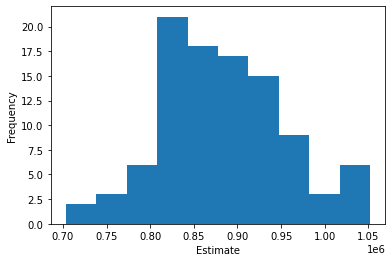

In [69]:
#Histogram takes 100 random tracks, takes the average of all their streams, then does this 100 times
#Is a standarrd deviation


from scipy.stats import normaltest
from numpy.random import seed
from numpy.random import randn


alpha = 0.05
#data = df['tempo'].sample(n=10).array
data = []
for i in range(0,100):
    data.append(np.mean(df['streams'].sample(n=100)))
print(data)
plt.hist(data)
plt.xlabel("Estimate")
plt.ylabel("Frequency")

<class 'int'>


Text(0, 0.5, 'streams in millions')

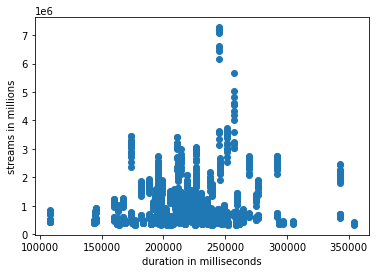

In [72]:
plt.scatter(df['duration_ms'],df['streams'])
plt.xlabel('duration in milliseconds')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

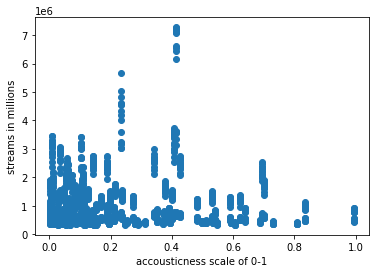

In [67]:
plt.scatter(df['acousticness'],df['streams'])
plt.xlabel('accousticness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

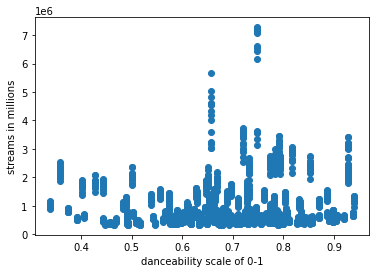

In [16]:
plt.scatter(df['danceability'],df['streams'])
plt.xlabel('danceability scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

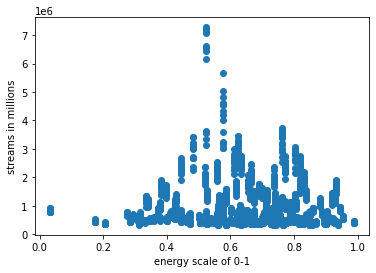

In [17]:
plt.scatter(df['energy'],df['streams'])
plt.xlabel('energy scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

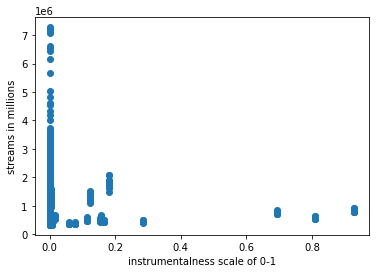

In [18]:
plt.scatter(df['instrumentalness'],df['streams'])
plt.xlabel('instrumentalness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

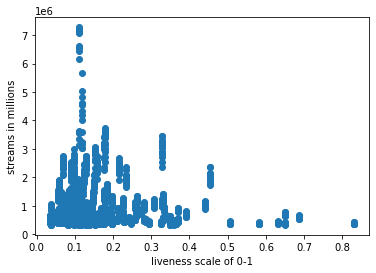

In [19]:
plt.scatter(df['liveness'],df['streams'])
plt.xlabel('liveness scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

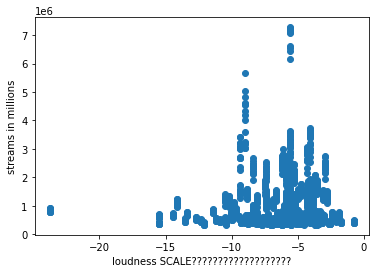

In [20]:
plt.scatter(df['loudness'],df['streams'])
plt.xlabel('loudness SCALE???????????????????')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

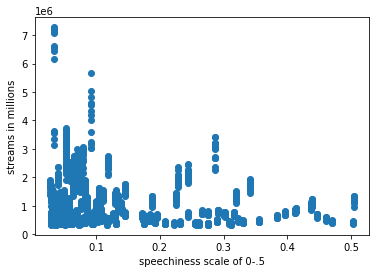

In [21]:
plt.scatter(df['speechiness'],df['streams'])
plt.xlabel('speechiness scale of 0-.5')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

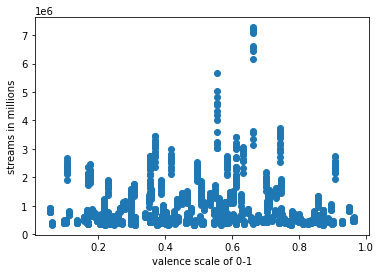

In [22]:
plt.scatter(df['valence'],df['streams'])
plt.xlabel('valence scale of 0-1')
plt.ylabel('streams in millions')

Text(0, 0.5, 'streams in millions')

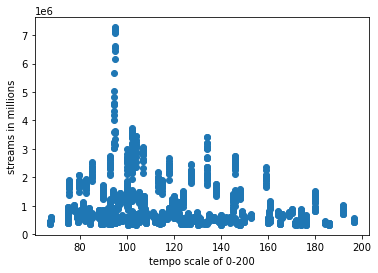

In [23]:
plt.scatter(df['tempo'],df['streams'])
plt.xlabel('tempo scale of 0-200')
plt.ylabel('streams in millions')

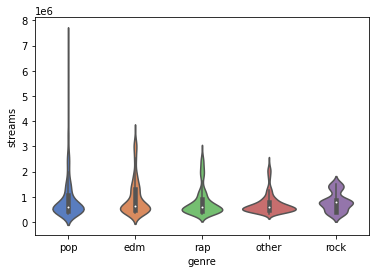

In [24]:
#violin plot of genre vs streams in millions
ax = sns.violinplot(x='genre', y='streams', data=df, palette='muted')


Text(0, 0.5, 'streams in millions')

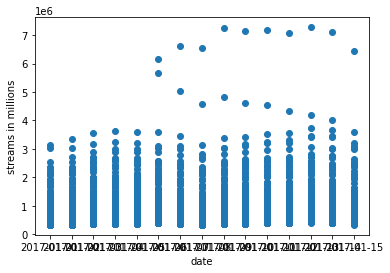

In [25]:
plt.scatter(df['date'],df['streams'])
plt.xlabel('date')
plt.ylabel('streams in millions')